In [1424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns

In [1425]:
plt.style.use('seaborn-paper')
plt.rcParams['grid.linewidth']=0.01
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['legend.handlelength']=0.7
plt.rcParams['legend.handletextpad']=0.5
plt.rcParams['legend.frameon']=False
plt.rcParams['legend.framealpha']=0
plt.rcParams['figure.dpi']=100
plt.rcParams['errorbar.capsize']=2
plt.rcParams['lines.markeredgewidth']=1

In [1499]:
model = 'cnn4conv'
method = 'default'
noise_type_lst = 'pairflip'
group_noise_rate = '(0.4, 0.4)'
iid = 'False'
dist_epochs = [90, 100, 110, 200, 300]

file_name = "loss_dist_model[{}]_method[{}]_noise['{}']_NR[{}]_IID[{}].png".format(model, method, noise_type_lst, group_noise_rate, iid) 
global_experiment = "loss_dist_model[{}]_method[{}]_noise['{}']_NR[{}]_IID[{}]".format(model, method, noise_type_lst, group_noise_rate, iid) 
client_experiment = "client_loss_dist_model[{}]_method[{}]_noise['{}']_NR[{}]_IID[{}]".format(model, method, noise_type_lst, group_noise_rate, iid)

In [1500]:
global_df = pd.read_csv("../save/lossdist/" + global_experiment + ".csv")
client_df = pd.read_csv("../save/lossdist/" + client_experiment + ".csv")

In [1501]:
global_df_by_epoch, client_df_by_epoch = [], []
global_noise_df, client_noise_df = [], [[] for i in range(len(dist_epochs))]
global_clean_df, client_clean_df = [], [[] for i in range(len(dist_epochs))]

for i in dist_epochs:
    global_df_by_epoch.append(global_df[global_df['epoch']==i])
    client_df_by_epoch.append(client_df[client_df['epoch']==i])

for i in range(len(dist_epochs)):
    noise_tmp0 = global_df_by_epoch[i][global_df_by_epoch[i]['is_noise']==1]
    clean_tmp0 = global_df_by_epoch[i][global_df_by_epoch[i]['is_noise']==0]
    noise_tmp1 = noise_tmp0['loss']
    clean_tmp1 = clean_tmp0['loss']
    global_noise_df.append(noise_tmp1)
    global_clean_df.append(clean_tmp1)
    for j in range(10):
        tmp2 = client_df_by_epoch[i][client_df_by_epoch[i]['client_num']==j]
        noise_tmp3 = tmp2[tmp2['is_noise']==1]
        clean_tmp3 = tmp2[tmp2['is_noise']==0]
        noise_tmp4 = noise_tmp3['loss']
        clean_tmp4 = clean_tmp3['loss']
        client_noise_df[i].append(noise_tmp4)
        client_clean_df[i].append(clean_tmp4)

In [1502]:
def plot_dist(gs, client_clean, client_noise, global_clean, global_noise, value='loss', title='pair', bins=50, xlim=[-0.3, 10], mode=0):
    
    label = ['client 0 Clean', 'Noise']
  
    # local plot
    for i in range(5):
        for j in range(10):
            label = ['Client ' + str(j) + ' Clean', 'Client ' + str(j) + ' Noise']
            if j < 5:
                plt.subplot(gs[3*i, j])
            else:
                plt.subplot(gs[3*i+1, j-5])
            plt.hist(client_clean[i][j], histtype='stepfilled', bins=bins, alpha=0.7, label=label[0], edgecolor='w', facecolor='cornflowerblue', density=True)
            plt.hist(client_noise[i][j], histtype='stepfilled', bins=bins, alpha=0.7, label=label[1], edgecolor='w', facecolor='gray', density=True)
            plt.xlim(xlim)
            plt.legend(loc='best')

    # global plot
    label = ['Global Clean', 'Global Noise']
    for i in range(5):       
        plt.subplot(gs[3*i, 5])
        plt.hist(global_clean[i], histtype='stepfilled', bins=bins, alpha=0.7, label=label[0], edgecolor='w', facecolor='coral', density=True)
        plt.hist(global_noise[i], histtype='stepfilled', bins=bins, alpha=0.7, label=label[1], edgecolor='w', facecolor='black', density=True)
        plt.xlim(xlim)
        plt.legend(loc='best')

    # merged plot
    for i in range(5):
        plt.subplot(gs[3*i+1, 5])
        for j in range(10):
            plt.hist(client_clean[i][j], histtype='stepfilled', bins=bins, alpha=0.3, label=label[0], edgecolor='w', facecolor='cornflowerblue', density=True)
            plt.hist(client_noise[i][j], histtype='stepfilled', bins=bins, alpha=0.3, label=label[1], edgecolor='w', facecolor='gray', density=True)
        plt.hist(global_clean[i], histtype='stepfilled', bins=bins, alpha=0.3, label=label[0], edgecolor='w', facecolor='coral', density=True)
        plt.hist(global_noise[i], histtype='stepfilled', bins=bins, alpha=0.3, label=label[1], edgecolor='w', facecolor='black', density=True)
        plt.xlim(xlim)
        plt.ylim([0, 1])
    

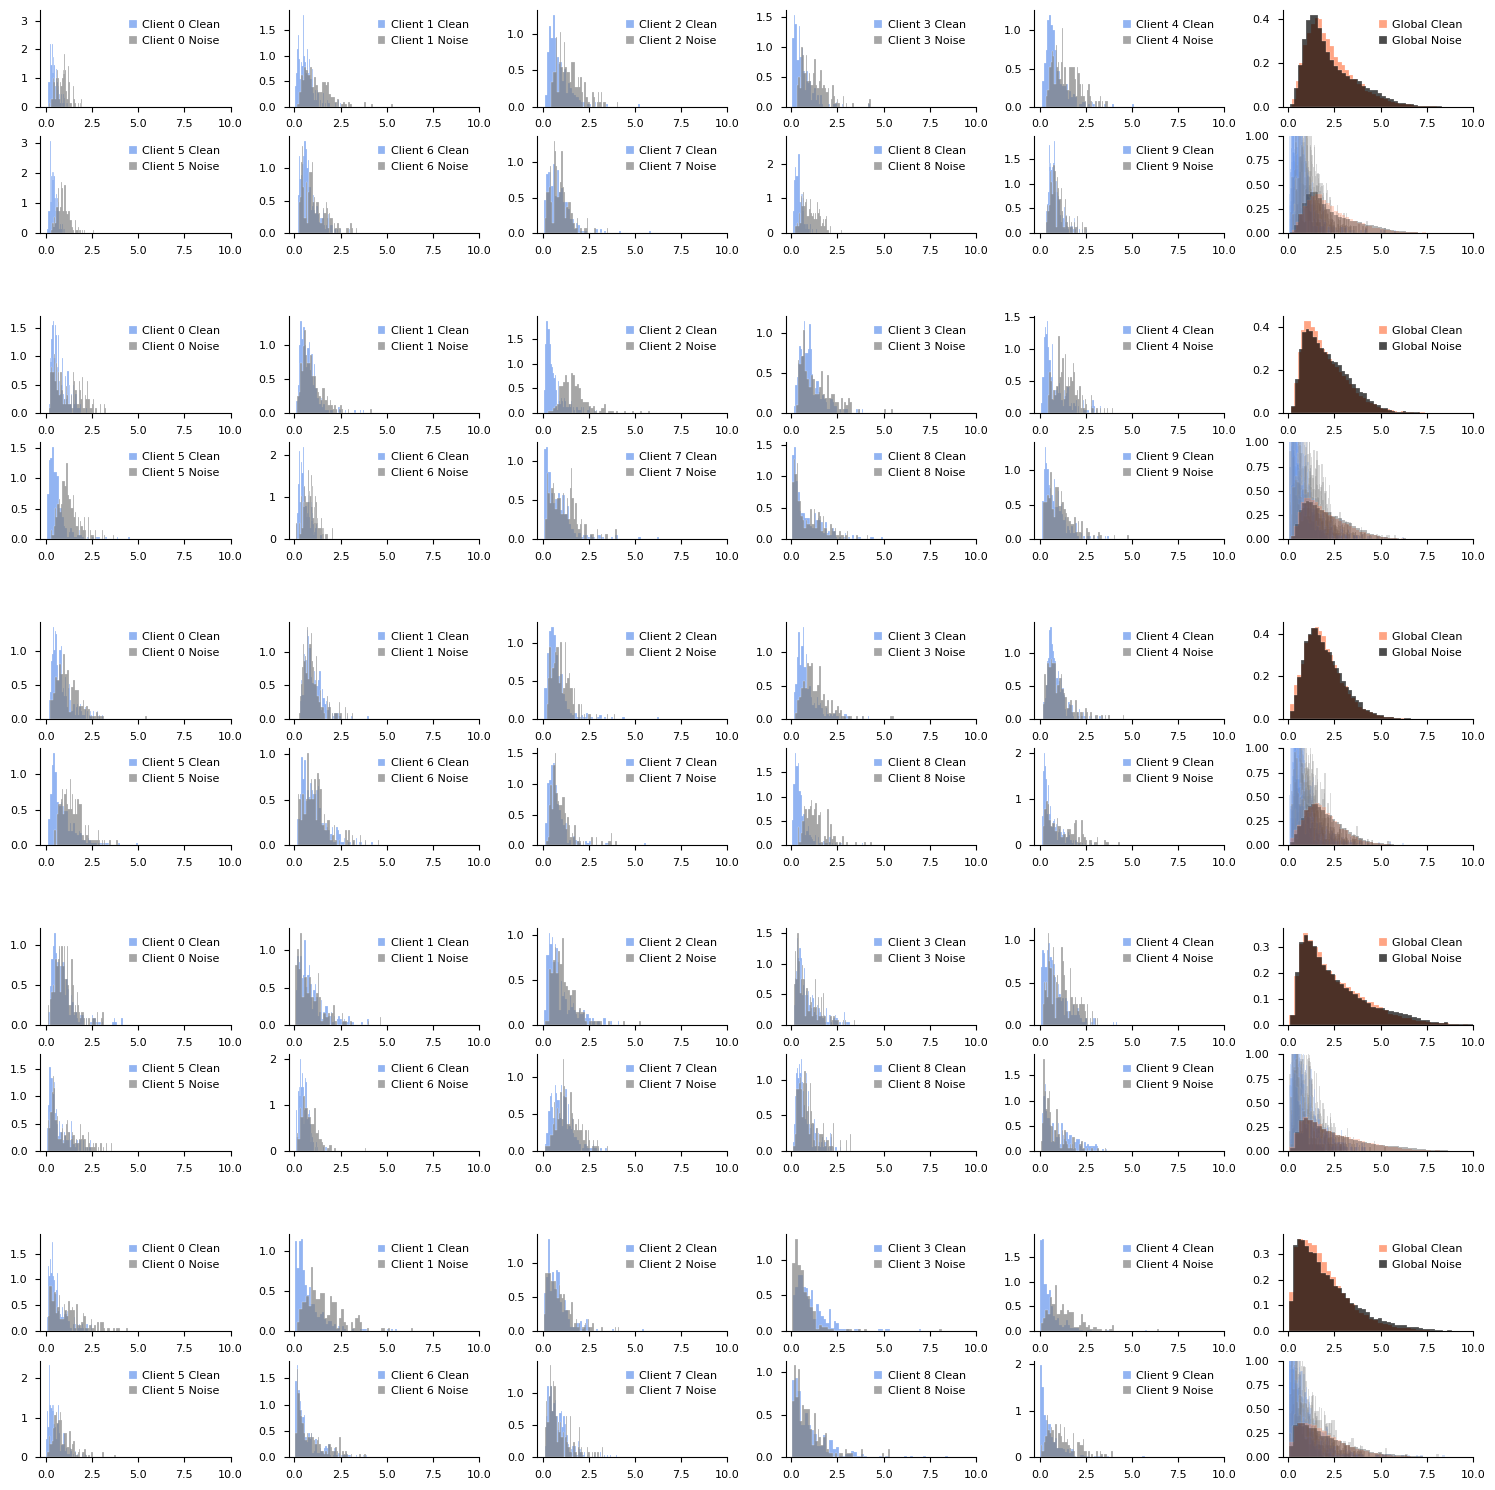

In [1503]:
fig=plt.figure(figsize=(15, 15))

gs = gridspec.GridSpec(14, 6, height_ratios=[4,4,1,4,4,1,4,4,1,4,4,1,4,4])

plot_dist(gs, client_clean=client_clean_df, client_noise=client_noise_df, global_clean=global_clean_df, global_noise=global_noise_df, value='loss', title='pair', bins=50, xlim=[-0.3, 10], mode=0)

plt.tight_layout(h_pad=0.2, w_pad=1.5)
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.05)

